In [27]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
df_main = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data.csv')
df_by_artist = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_artist.csv', index_col = 0)

In [29]:
df_eminem = df_main[df_main['artists'] == "['Eminem']"]
df_eminem.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
6581,0.03370,['Eminem'],0.950,284800,0.651,1,7Bi0aRtNAdchLnVBPjDrcx,0.000000,5,0.0424,-4.226,0,The Real Slim Shady,48,2005-12-06,0.0547,104.495,0.7770,2005
6648,0.05370,['Eminem'],0.619,281133,0.746,1,18TtVZgD09HpU7lUXR0kPI,0.000000,10,0.2950,-5.479,0,When I'm Gone,48,2005-12-06,0.3600,149.944,0.7570,2005
6650,0.00868,['Eminem'],0.692,326467,0.744,1,1jS7v1W7iS5ND9IYqfOxWo,0.000423,2,0.3590,-4.565,1,"Lose Yourself - From ""8 Mile"" Soundtrack",50,2005-12-06,0.2570,171.374,0.0612,2005
8102,0.02580,['Eminem'],0.847,173893,0.637,1,7ccTcabbJlCJiIqtrSSwBk,0.000648,1,0.3820,-5.193,1,Premonition - Intro,70,2020-01-17,0.3670,165.979,0.5110,2020
8110,0.03870,['Eminem'],0.720,194707,0.767,1,7Dj2wqPYXfSRFwa6qyOztr,0.000000,10,0.2020,-5.839,0,In Too Deep,70,2020-01-17,0.2140,88.966,0.5950,2020
14113,0.06690,['Eminem'],0.823,268440,0.744,0,5k7zON2QahcMSl4CFlJ0Kx,0.000000,0,0.1030,-6.665,1,My Name Is,42,1999-02-23,0.3550,85.483,0.7980,1999
14373,0.00491,['Eminem'],0.700,321960,0.738,0,3u0W3gJQNV5gegMmntzby8,0.000011,2,0.3500,-4.697,1,Lose Yourself - Soundtrack Version,46,2002-01-01,0.2650,171.404,0.0588,2002
14596,0.03150,['Eminem'],0.727,169587,0.606,1,27eOHLIdWzqzZawiRSEi9s,0.000002,0,0.1760,-4.843,1,Ricky Ticky Toc,46,2004-11-12,0.4120,172.068,0.5200,2004
15041,0.14900,['Eminem'],0.862,248200,0.936,1,7wuY9kPzREAC9OR7KScoli,0.000000,10,0.5510,-5.782,0,Hello,52,2009-05-15,0.1890,96.000,0.7180,2009
15088,0.14100,['Eminem'],0.634,227187,0.601,1,4R2ibsoF3A9Tv64DjEfyj9,0.000000,6,0.3260,-5.614,0,Careful What You Wish For,51,2009-05-15,0.4290,68.423,0.6010,2009


In [30]:
df2 = df_eminem.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'year']]
df2.reset_index(drop = True)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year
0,0.03370,0.950,0.651,0.000000,5,0.0424,-4.226,0.0547,104.495,0.7770,2005
1,0.05370,0.619,0.746,0.000000,10,0.2950,-5.479,0.3600,149.944,0.7570,2005
2,0.00868,0.692,0.744,0.000423,2,0.3590,-4.565,0.2570,171.374,0.0612,2005
3,0.02580,0.847,0.637,0.000648,1,0.3820,-5.193,0.3670,165.979,0.5110,2020
4,0.03870,0.720,0.767,0.000000,10,0.2020,-5.839,0.2140,88.966,0.5950,2020
...,...,...,...,...,...,...,...,...,...,...,...
176,0.19600,0.747,0.851,0.000000,10,0.2580,-3.350,0.2740,75.160,0.6290,2009
177,0.25100,0.876,0.878,0.000000,9,0.3210,-0.929,0.1680,97.990,0.6770,2009
178,0.29500,0.812,0.880,0.000000,1,0.1060,-1.521,0.2590,90.098,0.7780,2009
179,0.01310,0.635,0.712,0.000000,4,0.1870,-5.151,0.1100,78.598,0.4580,2009


In [31]:
med_data = df_eminem[['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness']].groupby(df_eminem.year).median()
med_data

,acousticness,danceability,energy,instrumentalness,speechiness
year,,,,,
1996,0.293000,0.6370,0.8620,0.000000,0.1910
1998,0.000644,0.5920,0.9010,0.000000,0.2530
1999,0.034850,0.7965,0.6430,0.000001,0.2700
2000,0.110650,0.8325,0.7075,0.000000,0.2665
2002,0.030700,0.7170,0.7310,0.000002,0.2230
2004,0.134000,0.7030,0.6820,0.000000,0.2775
2005,0.044900,0.7030,0.7440,0.000000,0.2570
2006,0.017100,0.5380,0.7300,0.000000,0.2760
2009,0.141000,0.7400,0.8310,0.000000,0.2150


Text(0, 0.5, 'Density')

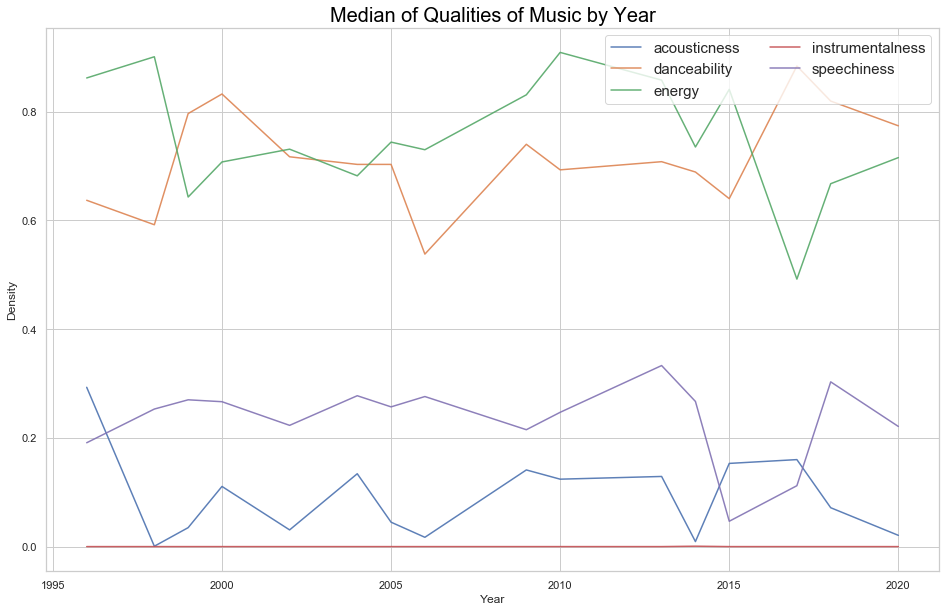

In [32]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in med_data.columns:
    plt.plot(med_data[column], marker='', linewidth= 1.5, alpha=0.9,label = column)


# Add legend
plt.legend(loc = 'upper right', ncol = 2,fontsize= 15)
 
# Add titles
plt.title("Median of Qualities of Music by Year", loc ='center', fontsize=20, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Density")

Text(0.5, 1.0, 'How has acousticness changed over time?')

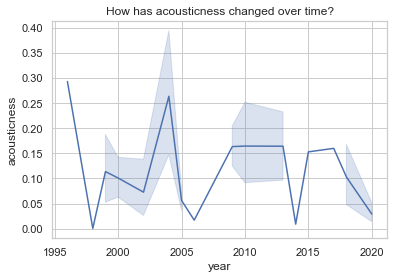

In [33]:
fig1 = sns.lineplot(x = 'year', y = 'acousticness', data = df_eminem)
fig1.set_title("How has acousticness changed over time?")

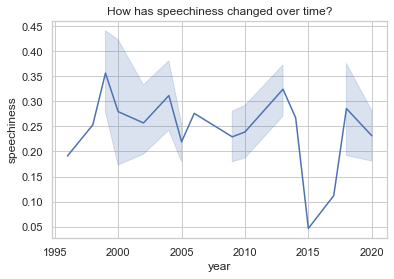

In [34]:
fig2 = sns.lineplot(x = 'year', y = 'speechiness', data = df_eminem).set_title("How has speechiness changed over time?")

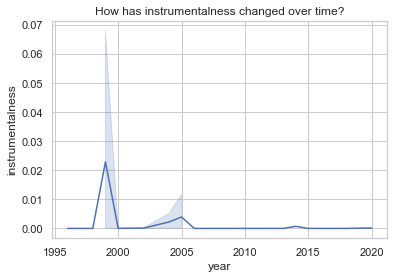

In [35]:
fig3 = sns.lineplot(x = 'year', y = 'instrumentalness', data = df_eminem).set_title("How has instrumentalness changed over time?")

In [36]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness']
x = df2.loc[:, features].values

In [37]:
y = df2.loc[:,['year']].values

In [14]:
x = StandardScaler().fit_transform(x)

In [38]:
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,energy,instrumentalness,speechiness
0,0.03370,0.950,0.651,0.000000,0.0547
1,0.05370,0.619,0.746,0.000000,0.3600
2,0.00868,0.692,0.744,0.000423,0.2570
3,0.02580,0.847,0.637,0.000648,0.3670
4,0.03870,0.720,0.767,0.000000,0.2140


In [39]:
pca = PCA(n_components = 2)

In [40]:
principalComponents = pca.fit_transform(x)

In [41]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [42]:
df_eminem_year = df2[['year']]
df_eminem_year.reset_index(drop = True)
df_eminem_year

,year
6581,2005
6648,2005
6650,2005
8102,2020
8110,2020
...,...
168752,2009
168766,2009
168793,2009
168805,2009


In [43]:
df_eminem_popularity = df_eminem[['popularity']]
df_eminem_popularity.reset_index(drop = True)
df_eminem_popularity

,popularity
6581,48
6648,48
6650,50
8102,70
8110,70
...,...
168752,53
168766,53
168793,54
168805,52


In [44]:
# df_eminem_year.to_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/cleandata/PCA_data_Zoeb/eminem_year.csv')
principalDf.to_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/cleandata/PCA_data_Zoeb/new_principalDf_eminem.csv')
# df_eminem_popularity.to_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/cleandata/PCA_data_Zoeb/eminem_popularity.csv')

In [45]:
finalDf = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/cleandata/PCA_data_Zoeb/new_principalDf_eminem.csv')
finalDf 

,principal component 1,principal component 2,popularity,year
0,-0.205290,0.230257,48,2005
1,0.025541,-0.093705,48,2005
2,-0.081468,-0.024869,50,2005
3,0.013556,0.117178,70,2020
4,-0.103817,-0.022163,70,2020
...,...,...,...,...
176,-0.002573,-0.106563,53,2009
177,-0.069046,-0.041806,53,2009
178,0.028008,-0.102995,54,2009
179,-0.150063,0.003067,52,2009


<Figure size 1152x720 with 0 Axes>

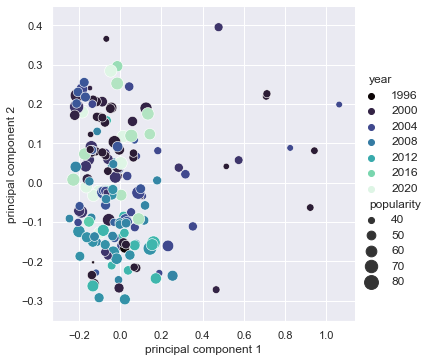

In [46]:
# this is for unscaled data
plt.figure(figsize=(16, 10))
sns.set_theme(style = "darkgrid")
sns.set_context("notebook")
ax = sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'year', size = 'popularity', sizes=(10, 200), palette = "mako", data = finalDf)